<a href="https://colab.research.google.com/github/InquietoPartho/Machine-Learning-Deep-Learning/blob/main/Feature_selection_with_chi2_and_f_classif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [2]:
#locate and read the diabetes file and makes pandas frame
df = pd.read_csv('/content/diabetes.csv')

In [4]:
#displaying the first 5 col and their details
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Analyze and Balance the Dataset

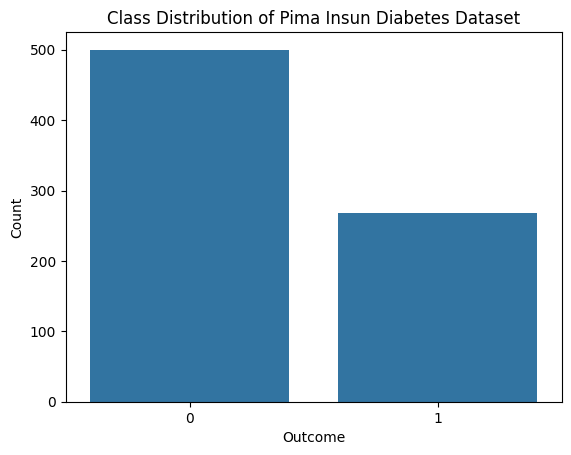

In [5]:
#count the plots of imbalanced dataset class disctribution
sns.countplot(x='Outcome',data=df)
plt.title('Class Distribution of Pima Insun Diabetes Dataset')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

#undersampling to reduce the majority class size

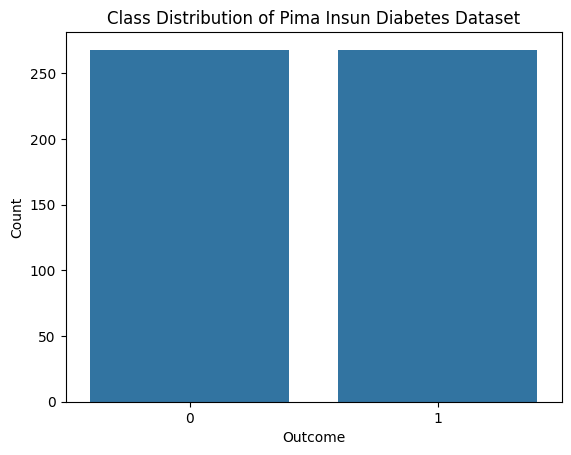

In [7]:
#separate majority and minority classes

df_majority = df[df.Outcome==0]
df_minority = df[df.Outcome==1]

#undersample majority class

df_majority_undersampled = resample(df_majority,
                                    replace=False,
                                    n_samples=len(df_minority),
                                    random_state=42)

#combine minority class with undersampled majority class

df_undersampled = pd.concat([df_majority_undersampled,df_minority])

#display new class distribution

sns.countplot(x='Outcome',data=df_undersampled)
plt.title('Class Distribution of Pima Insun Diabetes Dataset')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

#apply SMOTE to oversample the minority class

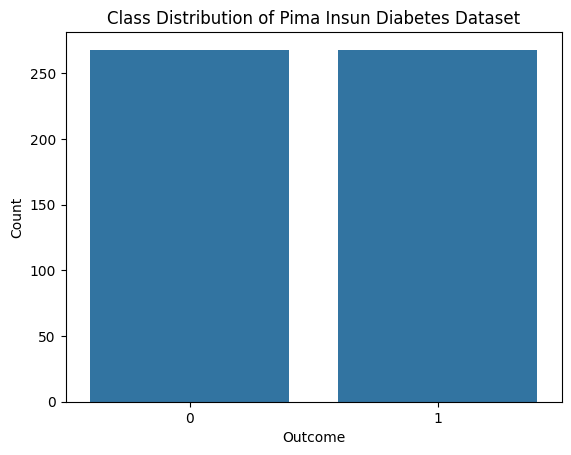

In [10]:
x  = df_undersampled.drop('Outcome',axis=1)
y = df_undersampled['Outcome']

smote = SMOTE(random_state=42)
x_smote,y_smote = smote.fit_resample(x,y)

#create a new dataframe after smote

df_smote = pd.concat([x_smote,y_smote],axis=1)

#display new class distribution

sns.countplot(x='Outcome',data=df_smote)
plt.title('Class Distribution of Pima Insun Diabetes Dataset')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

#Feature Selection Tecnique

Applying 'chi2' and 'f_classif' from 'sklearn.feature_selection'

In [12]:
#feature selection with chi2
chi2_selector = SelectKBest(score_func=chi2,k=5) #(select top 5 feature)
x_chi2 = chi2_selector.fit_transform(x_smote,y_smote)

#get selected feature indices and names
chi2_selected_features = x.columns[chi2_selector.get_support()]

#display selected features
print("Selected Features (Chi2):",chi2_selected_features)

#feature selection with f_classif
f_classif_selector = SelectKBest(f_classif,k=5)
x_f_classif = f_classif_selector.fit_transform(x_smote,y_smote)

#get selected feature indices and names
f_classif_selected_features = x.columns[f_classif_selector.get_support()]

#display selected features
print("Selected Features (F-Test):",f_classif_selected_features)


Selected Features (Chi2): Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')
Selected Features (F-Test): Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')


#creating new Dataset with newly selected features

In [14]:
#create new datasets based on selected features
df_selected_chi2 = pd.concat([pd.DataFrame(x_smote),pd.DataFrame(y_smote,columns=['Outcome'])],axis=1)
df_selected_f_classif = pd.concat([pd.DataFrame(x_smote),pd.DataFrame(y_smote,columns=['Outcome'])],axis=1)

#display the first few rows of the new dataset with chi2 and f_classif selected features
df_selected_chi2.head()
df_selected_f_classif.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,97,70,40,0,38.1,0.218,30,0
1,5,78,48,0,0,33.7,0.654,25,0
2,3,111,58,31,44,29.5,0.430,22,0
3,2,129,84,0,0,28.0,0.284,27,0
4,7,102,74,40,105,37.2,0.204,45,0
